## Observations and Insights 
- Over the course of 45 days 249 mices were treated with a vareity of drug regimens.
- Mouse ID g989 had a duplicate record and was not included in the final study.
- Out of 10 regimen, a deep dive study was made into Capomulin, Ramicane, Infubinol, and Ceftamin.
Capomulin and Ramicane were the most promising drugs. 
- The number of males vs females that were tested were almost equal.
- Infubinol had an outlier study.
- For Mouse ID k403 Tumor Volume decreased as the Timepoint increased.
- For Drug Regimen Capomulin weight increased along with an increase in Tumor Volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mice_study_df = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID" )
mice_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
row_count = len(mice_study_df["Mouse ID"].value_counts())
number_of_mice = pd.DataFrame([row_count], columns = ["Number of Mice"])
number_of_mice



,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mice_study_df.loc[mice_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_id = duplicate_mice_id[0]
dup_mice_id



'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = mice_study_df.loc[mice_study_df["Mouse ID"] == dup_mice_id]
dup_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = mice_study_df[mice_study_df['Mouse ID'].isin(duplicate_mice_id)==False]
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.


regimen_series = pd.Series(clean_study_data['Tumor Volume (mm3)'].values,index=clean_study_data['Drug Regimen'])

# mean
series_mean = regimen_series.mean(level=0)

# median
series_median = regimen_series.median(level=0)

# variance
series_var = regimen_series.var(level=0)

# standard deviation
series_std_dev = regimen_series.std(level=0)

# SEM
series_SEM = regimen_series.sem(level=0)


series_summary_table = pd.DataFrame({"Mean": series_mean, "Median":series_median, "Variance":series_var, "Standard Deviation": series_std_dev, "SEM": series_SEM})
print(series_summary_table)





                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

grouped_regimen = clean_study_data.groupby(["Drug Regimen"])

#Total tumor volumen for each regimen
tumor_volume = grouped_regimen["Tumor Volume (mm3)"].sum()

#create the mean of each regimen
mean_regimen = grouped_regimen["Tumor Volume (mm3)"].mean()

#create the median for each regimen
median_regimen = grouped_regimen["Tumor Volume (mm3)"].median()

#create the variance each regimen
var_regimen = grouped_regimen["Tumor Volume (mm3)"].var()
var_regimen

#create standard deviation for each regimen
std_regimen = grouped_regimen["Tumor Volume (mm3)"].std()

#create SEM for each regimen
sem_regimen = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_stats_table = pd.DataFrame({"Mean": mean_regimen, "Median":median_regimen, "Variance":var_regimen, "Standard Deviation": std_regimen, "SEM": sem_regimen})
summary_stats_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

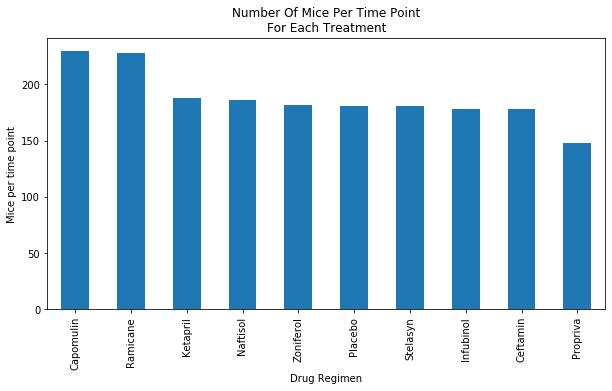

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Group by Drug Regimen
datapoints = clean_study_data["Drug Regimen"].value_counts()
y_axis=datapoints.values
x_axis=datapoints.index

datapoints.plot(kind="bar",figsize=(10,5))
plt.title("Number Of Mice Per Time Point\nFor Each Treatment")

plt.ylabel("Mice per time point")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

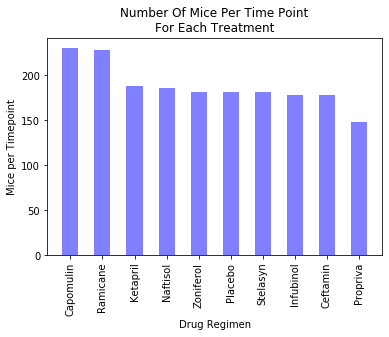

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
datapoints = clean_study_data["Drug Regimen"].value_counts()
y_axis=datapoints.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=datapoints.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)

#Formatting
plt.ylabel("Mice per Timepoint")
plt.xlabel("Drug Regimen")
plt.title("Number Of Mice Per Time Point\nFor Each Treatment")
plt.xticks(rotation=90)

plt.show()

## Pie Plots

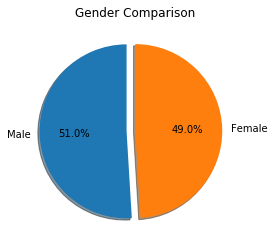

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=clean_study_data["Sex"].value_counts()
labels=gender_count.values
sizes=gender_count.values
#colors=["red", "blue"]
explode=[0.1,0]
#gender_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
gender_count.plot(kind="pie", explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

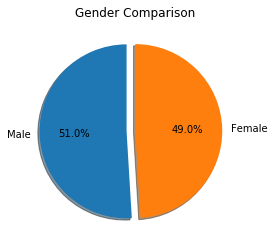

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=clean_study_data["Sex"].value_counts()
labels=gender_count.index
sizes=gender_count.values
#colors=["blue", "red"]
explode=[0.1,0]
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

max_tumor=clean_study_data.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_study_data, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)

top_4 = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4 = top_4.sort_values(["Timepoint"], ascending=True)
top_4_data = top_4[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

regimen_list = {"Capomulin", "Ramicane", "Infubinol", "Ceftamin"}

for x in regimen_list:
    print(x)
    regimen_data = merge_data.loc[merge_data['Drug Regimen'] == x]['Tumor Volume (mm3)']
    quartile_cap = regimen_data.quantile([.25,.5,.75])
    lower_cap= quartile_cap[.25]
    upper_cap=quartile_cap[.75]
    iqr= upper_cap-lower_cap
    lower_ocap= lower_cap-(1.5*iqr)
    upper_ocap= upper_cap+(1.5*iqr)
    
    print(f"The lower quartile of {x} is: {lower_cap}")
    print(f"The upper quartile of {x} is: {upper_cap}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The the median of {x} is: {quartile_cap[0.5]} ")
    print(f"Values below {lower_ocap} could be outliers.")
    print(f"Values above {upper_ocap} could be outliers.")
    print()




Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.

Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper qua

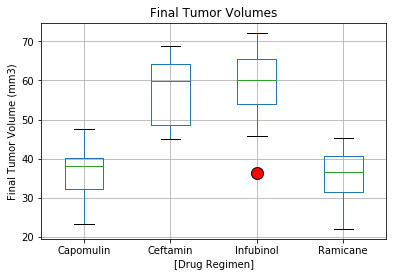

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
top_4_data.boxplot(column=["Tumor Volume (mm3)"],by=["Drug Regimen"],flierprops=orange_out)

plt.title("Final Tumor Volumes")
plt.suptitle("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

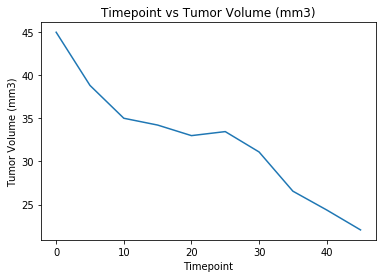

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']
mouse = clean_study_data.loc[clean_study_data['Mouse ID'] == 'k403']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

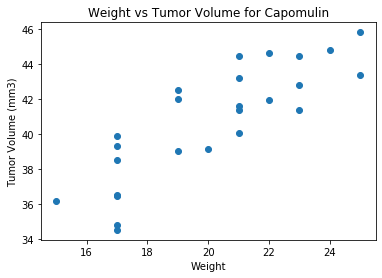

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table= clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_table.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()



## Correlation and Regression

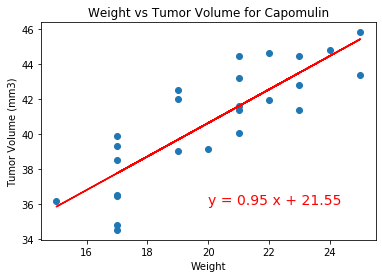

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
